In [12]:
from CNN import tCNN

### Getting Data

In [13]:
import pickle
with open('Data_simple.pkl', 'rb') as f:
    Final = pickle.load(f)
    
X = Final[0]
Y = Final[1]

### Random Shuffle

In [14]:
import random

XY = list(zip(X, Y))
random.shuffle(XY)

X, Y = zip(*XY)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 10, 10, 1)    0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 8, 8, 64)     640         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 8, 8, 64)     640         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 8, 8, 64)     640         input_3[0][0]                    
__________________________________________________________________________________________________
max_poolin

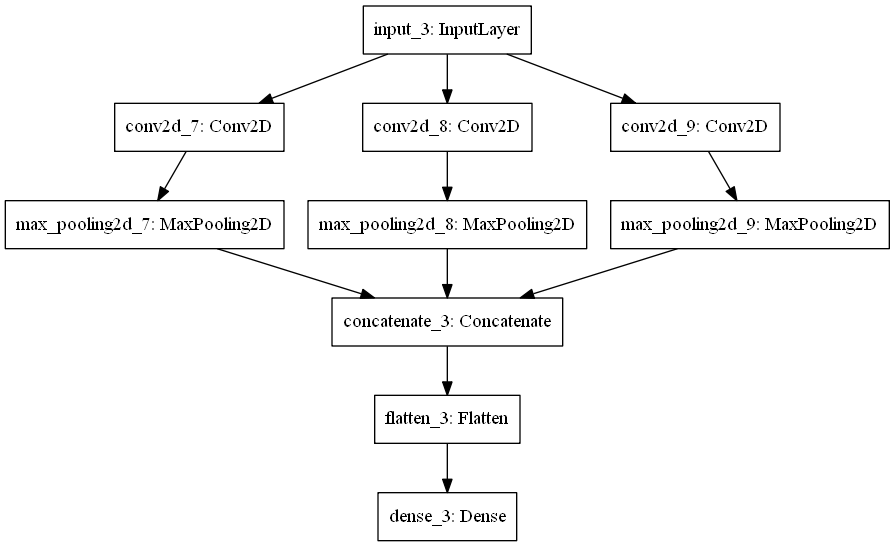

In [15]:
tCNN()


from keras.utils import plot_model
from IPython.display import Image
from keras.models import load_model

model = load_model('CNN_model_init.h5')
plot_model(model, to_file='CNN_arch.png')
Image(filename='./CNN_arch.png')

## Reshaping array

In [16]:
import numpy as np

X = np.asarray(X)
Y = np.asarray(Y)

X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
Y = Y.reshape(Y.shape[0], 1)

print(f"X shape : {X.shape}\nY shape : {Y.shape}")

X shape : (169, 10, 10, 1)
Y shape : (169, 1)


In [17]:
x_train = X[0:140]
y_train = Y[0:140]

x_test = X[140:]
y_test = Y[140:]

### Training Model

In [18]:
# callback function
import keras
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

model.fit(x_train, y_train,
          epochs=1000,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[callback])

try:
    model.save('CNN_model_final.h5')
    print("Model Saved!")
except:
    print("Error in saving Model")

Train on 140 samples, validate on 29 samples
Epoch 1/1000
140/140 [==============================] - 2s 15ms/step - loss: 2.0294 - acc: 0.1500 - val_loss: 1.8704 - val_acc: 0.1724
Epoch 2/1000
140/140 [==============================] - 0s 605us/step - loss: 1.8271 - acc: 0.2214 - val_loss: 1.7198 - val_acc: 0.2759
Epoch 3/1000
140/140 [==============================] - 0s 486us/step - loss: 1.6708 - acc: 0.4214 - val_loss: 1.5809 - val_acc: 0.5172
Epoch 4/1000
140/140 [==============================] - 0s 561us/step - loss: 1.5024 - acc: 0.7857 - val_loss: 1.4826 - val_acc: 0.7931
Epoch 5/1000
140/140 [==============================] - 0s 561us/step - loss: 1.3728 - acc: 0.8714 - val_loss: 1.3807 - val_acc: 0.8276
Epoch 6/1000
140/140 [==============================] - 0s 732us/step - loss: 1.2580 - acc: 0.9000 - val_loss: 1.2615 - val_acc: 0.8621

Reached 90% accuracy so cancelling training!
Model Saved!


In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[1.261522889137268, 0.8620689511299133]

In [20]:
classes = model.predict(x_test)
print(classes)

[[0.24844752 0.11173458 0.02410917 0.18920831 0.12304693 0.11975721
  0.09447797 0.08921827]
 [0.08876543 0.18047656 0.00203637 0.08879018 0.17165126 0.02849277
  0.4254962  0.01429127]
 [0.14377874 0.3120512  0.01930956 0.14117007 0.09490353 0.12525105
  0.08832876 0.07520702]
 [0.10993318 0.08352124 0.0060942  0.23504469 0.4517394  0.05962149
  0.04400111 0.01004469]
 [0.07641075 0.11799919 0.00372739 0.06235945 0.5733514  0.03493585
  0.06380854 0.06740747]
 [0.11362144 0.17252599 0.02758099 0.3223321  0.07152142 0.11342604
  0.08228314 0.09670884]
 [0.02417673 0.0296894  0.00175219 0.02407448 0.8600627  0.01081086
  0.04069169 0.00874197]
 [0.13525473 0.12284777 0.02876994 0.14820829 0.11920944 0.23890442
  0.11591115 0.09089424]
 [0.0548518  0.04826887 0.00168791 0.19322947 0.5810475  0.05601875
  0.05802653 0.00686923]
 [0.14776288 0.15688528 0.03847481 0.20997465 0.08485123 0.17370701
  0.10769492 0.0806492 ]
 [0.23662004 0.16510227 0.019      0.18217492 0.1126828  0.12665376
  

In [21]:
classes.shape

(29, 8)

In [22]:
x_test.shape

(29, 10, 10, 1)

In [23]:
y_test[0]

array([0])